In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np

In [3]:
np.column_stack(([1,2,3], [4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [4]:
fish_data = np.column_stack((fish_length, fish_weight))

In [5]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [6]:
print(np.ones(5))

[1. 1. 1. 1. 1.]


In [7]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [8]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [9]:
# 사이킷런으로 훈련 세트와 테스트 세트 나누기
from sklearn.model_selection import train_test_split

In [10]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, random_state=42)

In [19]:
print(fish_target.shape)

(49,)


In [11]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [12]:
print(train_target.shape, test_target.shape)

(36,) (13,)


In [13]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [16]:
# 빙어 0, 도미 1
# 36 개에서 다시 쪼개진다.
len(train_target[train_target == 1]),  len(train_target[train_target == 0])

(26, 10)

In [17]:
len(test_target[test_target == 1]),  len(test_target[test_target == 0])

(9, 4)

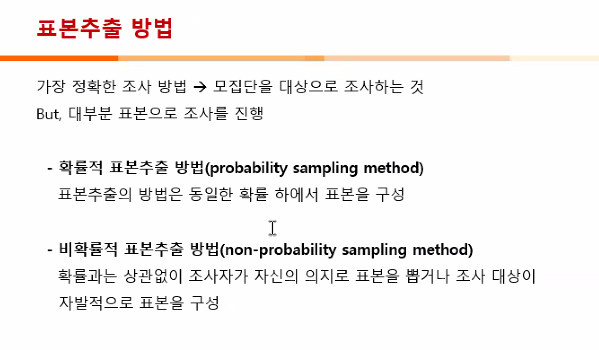

In [20]:
# stratify : 비례층화 표본추출 (통계때 배우는 것이다.)
# 살짝 말하고 넘어왔슴.
train_input2, test_input2, train_target2, test_target2 = train_test_split(
    fish_data, fish_target, stratify = fish_target, random_state=42)


In [21]:
print(test_target2)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [23]:
len(train_target2[train_target2 == 1]),  len(train_target2[train_target2 == 0])

(26, 10)

In [22]:
len(test_target2[test_target2 == 1]),  len(test_target2[test_target2 == 0])

(9, 4)

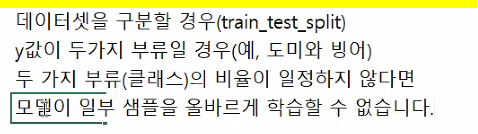

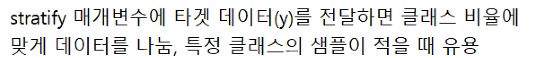

## 수상한 도미 1마리

In [29]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [56]:
distances , indexes = kn.kneighbors([[25, 150]])

In [57]:
kn.predict([[25, 150]]) 

array([0.])

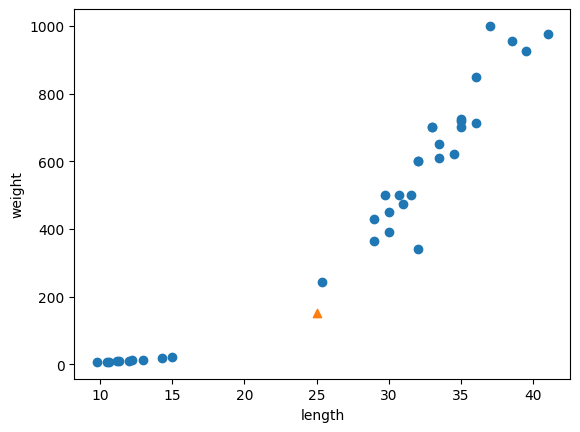

In [58]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

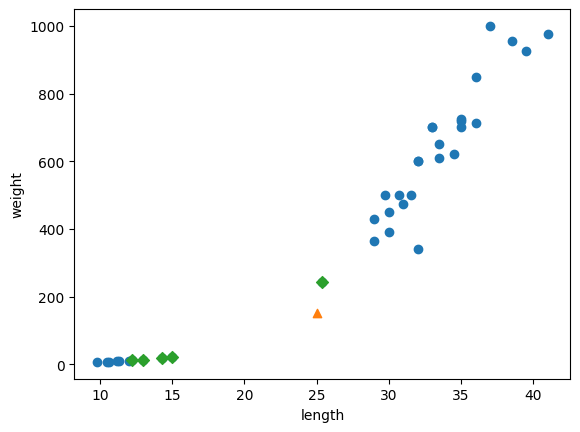

In [59]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [60]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [61]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


In [62]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


## 기준을 맞춰라

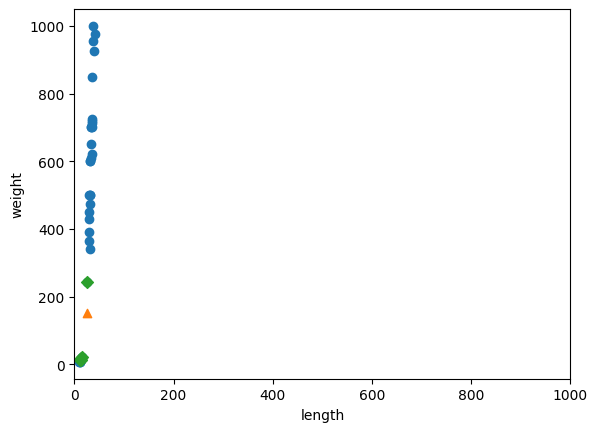

In [43]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [44]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

In [45]:
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [46]:
train_scaled = (train_input - mean) / std

## 전처리 데이터로 모델 훈련하기

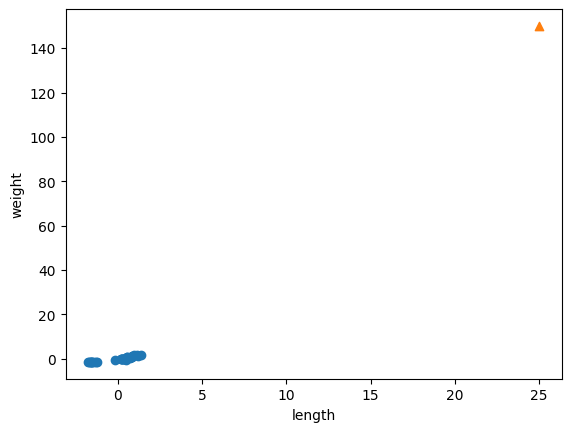

In [63]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [64]:
new = ([25, 150] - mean) / std

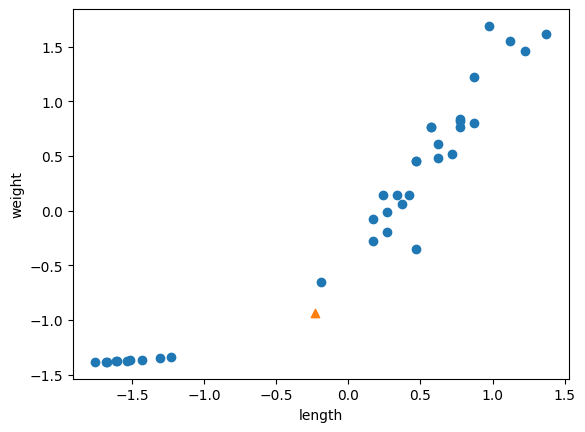

In [65]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [66]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [67]:
test_scaled = (test_input - mean) / std

In [68]:
kn.score(test_scaled, test_target)

1.0

In [69]:
print(kn.predict([new]))

[1.]


In [70]:
distances, indexes = kn.kneighbors([new])

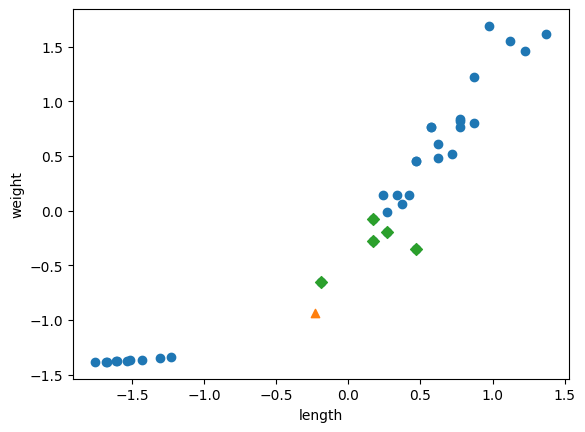

: 

In [71]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()